# Date Collection

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Load the cleaned dataset (assume cleaned from Task 1)
df = pd.read_csv('../data/cleaned_week2_challenge_data_source_final.csv')
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [10]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [11]:
# Data Aggregation per Customer ID (MSISDN) per MSISDN
engagement_metrics = df.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count',  # Sessions frequency
    'Dur. (ms)': 'sum',    # Total session duration
    'Total DL (Bytes)': 'sum',  # Total Download data
    'Total UL (Bytes)': 'sum'   # Total Upload data
}).reset_index()

In [12]:
# Rename columns for clarity
engagement_metrics.columns = ['MSISDN', 'Sessions Frequency', 'Total Duration (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)']

# Calculate total traffic (Download + Upload)
engagement_metrics['Total Traffic (Bytes)'] = engagement_metrics['Total DL (Bytes)'] + engagement_metrics['Total UL (Bytes)']
engagement_metrics['Total Traffic (Bytes)']

0         8.786906e+08
1         1.568596e+08
2         5.959665e+08
3         4.223207e+08
4         1.457411e+09
              ...     
106851    7.146416e+08
106852    4.803073e+08
106853    2.321240e+08
106854    5.962878e+08
106855    1.391536e+08
Name: Total Traffic (Bytes), Length: 106856, dtype: float64

In [13]:
# Top 10 customers per engagement metric
top_10_sessions = engagement_metrics.nlargest(10, 'Sessions Frequency')
top_10_duration = engagement_metrics.nlargest(10, 'Total Duration (ms)')
top_10_traffic = engagement_metrics.nlargest(10, 'Total Traffic (Bytes)')

In [14]:
print ("top 10 Sessional frequency")
top_10_sessions

top 10 Sessional frequency


,MSISDN,Sessions Frequency,Total Duration (ms),Total DL (Bytes),Total UL (Bytes),Total Traffic (Bytes)
53644,3.366371e+10,1067,72655568.0,4.875453e+11,4.441826e+10,5.319636e+11
13526,3.362632e+10,18,8791927.0,7.301517e+09,6.696507e+08,7.971167e+09
6437,3.361489e+10,17,9966898.0,8.156743e+09,6.894830e+08,8.846226e+09
13180,3.362578e+10,17,18553754.0,7.770043e+09,7.295774e+08,8.499621e+09
37052,3.365973e+10,16,4035428.0,7.081602e+09,6.242603e+08,7.705863e+09
76363,3.367588e+10,15,4865947.0,7.309542e+09,5.815688e+08,7.891111e+09
92923,3.376054e+10,15,9279434.0,7.811295e+09,7.034786e+08,8.514774e+09
65118,3.366716e+10,13,8744914.0,5.052068e+09,5.663264e+08,5.618394e+09
666,3.360313e+10,12,6287761.0,4.540607e+09,4.355876e+08,4.976195e+09
1279,3.360452e+10,12,5207990.0,5.096079e+09,3.917759e+08,5.487855e+09


In [15]:
print ("top 10 duration")
top_10_duration

top 10 duration


,MSISDN,Sessions Frequency,Total Duration (ms),Total DL (Bytes),Total UL (Bytes),Total Traffic (Bytes)
53644,3.366371e+10,1067,72655568.0,4.875453e+11,4.441826e+10,5.319636e+11
13180,3.362578e+10,17,18553754.0,7.770043e+09,7.295774e+08,8.499621e+09
6437,3.361489e+10,17,9966898.0,8.156743e+09,6.894830e+08,8.846226e+09
92923,3.376054e+10,15,9279434.0,7.811295e+09,7.034786e+08,8.514774e+09
13526,3.362632e+10,18,8791927.0,7.301517e+09,6.696507e+08,7.971167e+09
65118,3.366716e+10,13,8744914.0,5.052068e+09,5.663264e+08,5.618394e+09
50281,3.366284e+10,9,6614270.0,3.593674e+09,4.064244e+08,4.000098e+09
57160,3.366469e+10,9,6288730.0,5.279827e+09,4.021808e+08,5.682007e+09
666,3.360313e+10,12,6287761.0,4.540607e+09,4.355876e+08,4.976195e+09
66029,3.366746e+10,6,5649882.0,2.334299e+09,2.662226e+08,2.600522e+09


In [16]:
print ("top 10 traffic")
top_10_traffic

top 10 traffic


,MSISDN,Sessions Frequency,Total Duration (ms),Total DL (Bytes),Total UL (Bytes),Total Traffic (Bytes)
53644,3.366371e+10,1067,72655568.0,4.875453e+11,4.441826e+10,5.319636e+11
6437,3.361489e+10,17,9966898.0,8.156743e+09,6.894830e+08,8.846226e+09
92923,3.376054e+10,15,9279434.0,7.811295e+09,7.034786e+08,8.514774e+09
13180,3.362578e+10,17,18553754.0,7.770043e+09,7.295774e+08,8.499621e+09
13526,3.362632e+10,18,8791927.0,7.301517e+09,6.696507e+08,7.971167e+09
76363,3.367588e+10,15,4865947.0,7.309542e+09,5.815688e+08,7.891111e+09
37052,3.365973e+10,16,4035428.0,7.081602e+09,6.242603e+08,7.705863e+09
63028,3.366646e+10,11,4536757.0,6.903440e+09,4.050610e+08,7.308501e+09
92577,3.376041e+10,12,5321667.0,6.610852e+09,5.215189e+08,7.132371e+09
57241,3.366471e+10,11,2927785.0,6.400774e+09,4.712445e+08,6.872018e+09


In [17]:
# Normalize metrics for clustering
scaler = StandardScaler()
normalized_metrics = pd.DataFrame(scaler.fit_transform(engagement_metrics[['Sessions Frequency', 'Total Duration (ms)', 'Total Traffic (Bytes)']]), 
                                  columns=['Sessions Frequency', 'Total Duration (ms)', 'Total Traffic (Bytes)'])

normalized_metrics


,Sessions Frequency,Total Duration (ms),Total Traffic (Bytes)
0,-0.120240,-0.103987,0.107641
1,-0.120240,0.118685,-0.317516
2,-0.120240,-0.040996,-0.058883
3,-0.120240,-0.334708,-0.161160
4,0.177556,-0.378800,0.448506
...,...,...,...
106851,-0.120240,-0.476463,0.011016
106852,-0.120240,-0.020220,-0.127006
106853,-0.120240,2.521627,-0.273186
106854,-0.120240,0.366519,-0.058694


In [18]:
# K-means Clustering (k=3)
kmeans = KMeans(n_clusters=3, random_state=0)
engagement_metrics['Cluster'] = kmeans.fit_predict(normalized_metrics)

# Task 2.1 - Cluster statistics
cluster_stats = engagement_metrics.groupby('Cluster').agg({
    'Sessions Frequency': ['min', 'max', 'mean', 'sum'],
    'Total Duration (ms)': ['min', 'max', 'mean', 'sum'],
    'Total Traffic (Bytes)': ['min', 'max', 'mean', 'sum']
})

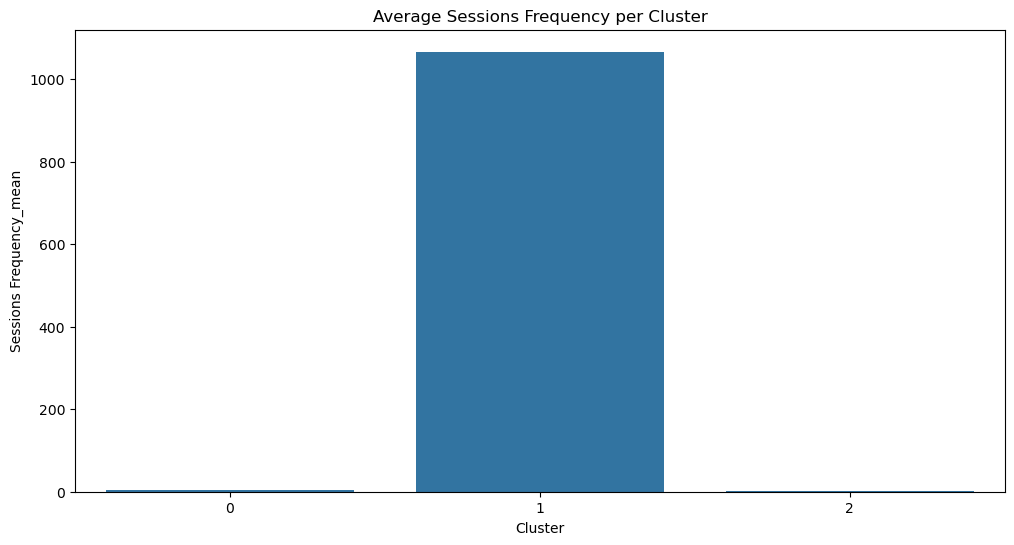

In [19]:
# Visualize Cluster statistics
cluster_stats.columns = ['_'.join(col) for col in cluster_stats.columns]
cluster_stats = cluster_stats.reset_index()

# Plot Cluster statistics
plt.figure(figsize=(12, 6))
sns.barplot(x='Cluster', y='Sessions Frequency_mean', data=cluster_stats)
plt.title('Average Sessions Frequency per Cluster')
plt.show()

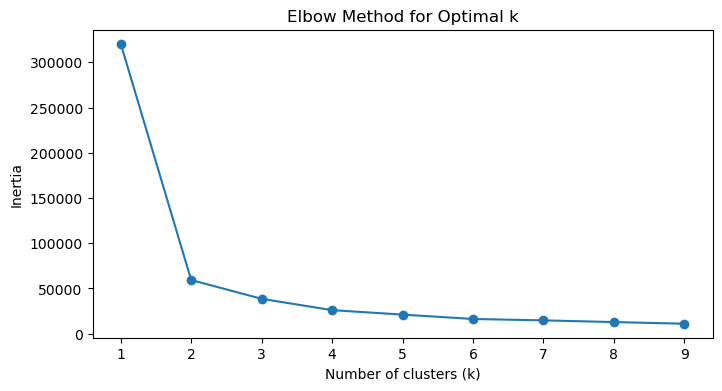

In [20]:
# Elbow Method to Find Optimal k
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(normalized_metrics)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [21]:

# Aggregate total traffic per application and find top 10 users per app
app_columns = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)', 
               'Google DL (Bytes)', 'Google UL (Bytes)', 
               'Email DL (Bytes)', 'Email UL (Bytes)', 
               'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 
               'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 
               'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 
               'Other DL (Bytes)', 'Other UL (Bytes)']


In [22]:
# Total traffic per application
df['Total Social Media Traffic'] = df['Social Media DL (Bytes)'] + df['Social Media UL (Bytes)']
df['Total Google Traffic'] = df['Google DL (Bytes)'] + df['Google UL (Bytes)']
df['Total Email Traffic'] = df['Email DL (Bytes)'] + df['Email UL (Bytes)']
df['Total Youtube Traffic'] = df['Youtube DL (Bytes)'] + df['Youtube UL (Bytes)']
df['Total Netflix Traffic'] = df['Netflix DL (Bytes)'] + df['Netflix UL (Bytes)']
df['Total Gaming Traffic'] = df['Gaming DL (Bytes)'] + df['Gaming UL (Bytes)']
df['Total Other Traffic'] = df['Other DL (Bytes)'] + df['Other UL (Bytes)']


In [23]:

# Aggregating traffic per user (MSISDN/Number) for each application
app_traffic = df.groupby('MSISDN/Number').agg({
    'Total Social Media Traffic': 'sum',
    'Total Google Traffic': 'sum',
    'Total Email Traffic': 'sum',
    'Total Youtube Traffic': 'sum',
    'Total Netflix Traffic': 'sum',
    'Total Gaming Traffic': 'sum',
    'Total Other Traffic': 'sum'
}).reset_index()

In [24]:
# Top 10 most engaged users per application
top_10_social_media = app_traffic.nlargest(10, 'Total Social Media Traffic')
top_10_google = app_traffic.nlargest(10, 'Total Google Traffic')
top_10_youtube = app_traffic.nlargest(10, 'Total Youtube Traffic')


In [25]:
top_10_social_media

,MSISDN/Number,Total Social Media Traffic,Total Google Traffic,Total Email Traffic,Total Youtube Traffic,Total Netflix Traffic,Total Gaming Traffic,Total Other Traffic
53644,3.366371e+10,1.974199e+09,8.250702e+09,2.403622e+09,2.435073e+10,2.428211e+10,4.616346e+11,4.516521e+11
13526,3.362632e+10,4.337478e+07,1.521919e+08,4.241878e+07,3.744830e+08,3.287257e+08,6.887572e+09,8.167878e+09
92923,3.376054e+10,3.978319e+07,1.232231e+08,3.369377e+07,3.962892e+08,3.346433e+08,7.461045e+09,4.716134e+09
37052,3.365973e+10,3.541236e+07,1.165163e+08,3.599979e+07,2.579911e+08,3.995191e+08,6.725559e+09,6.317415e+09
6437,3.361489e+10,2.829454e+07,1.279738e+08,4.078863e+07,3.943702e+08,3.614010e+08,7.749432e+09,7.639264e+09
13180,3.362578e+10,2.713550e+07,1.423079e+08,4.063397e+07,4.529588e+08,3.569806e+08,7.326673e+09,6.354583e+09
65118,3.366716e+10,2.424785e+07,1.050327e+08,3.033580e+07,3.152313e+08,3.139395e+08,4.725622e+09,4.941519e+09
106137,3.378632e+10,2.397492e+07,1.102545e+08,3.631012e+07,2.147639e+08,3.059398e+08,4.851096e+09,4.252487e+09
70960,3.366907e+10,2.380083e+07,7.782468e+07,2.292341e+07,2.364028e+08,2.120090e+08,3.269152e+09,4.605369e+09
666,3.360313e+10,2.307782e+07,8.692902e+07,2.619890e+07,2.840901e+08,2.604884e+08,4.191445e+09,6.326671e+09


In [26]:
top_10_google

,MSISDN/Number,Total Social Media Traffic,Total Google Traffic,Total Email Traffic,Total Youtube Traffic,Total Netflix Traffic,Total Gaming Traffic,Total Other Traffic
53644,3.366371e+10,1.974199e+09,8.250702e+09,2.403622e+09,2.435073e+10,2.428211e+10,4.616346e+11,4.516521e+11
13526,3.362632e+10,4.337478e+07,1.521919e+08,4.241878e+07,3.744830e+08,3.287257e+08,6.887572e+09,8.167878e+09
13180,3.362578e+10,2.713550e+07,1.423079e+08,4.063397e+07,4.529588e+08,3.569806e+08,7.326673e+09,6.354583e+09
6437,3.361489e+10,2.829454e+07,1.279738e+08,4.078863e+07,3.943702e+08,3.614010e+08,7.749432e+09,7.639264e+09
92923,3.376054e+10,3.978319e+07,1.232231e+08,3.369377e+07,3.962892e+08,3.346433e+08,7.461045e+09,4.716134e+09
37052,3.365973e+10,3.541236e+07,1.165163e+08,3.599979e+07,2.579911e+08,3.995191e+08,6.725559e+09,6.317415e+09
106137,3.378632e+10,2.397492e+07,1.102545e+08,3.631012e+07,2.147639e+08,3.059398e+08,4.851096e+09,4.252487e+09
76363,3.367588e+10,1.922292e+07,1.098605e+08,3.151442e+07,3.174106e+08,3.090932e+08,6.970568e+09,6.798515e+09
65118,3.366716e+10,2.424785e+07,1.050327e+08,3.033580e+07,3.152313e+08,3.139395e+08,4.725622e+09,4.941519e+09
94654,3.376127e+10,1.449608e+07,9.708999e+07,2.075372e+07,2.727896e+08,2.920913e+08,4.274099e+09,5.077779e+09


In [27]:
top_10_youtube

,MSISDN/Number,Total Social Media Traffic,Total Google Traffic,Total Email Traffic,Total Youtube Traffic,Total Netflix Traffic,Total Gaming Traffic,Total Other Traffic
53644,3.366371e+10,1.974199e+09,8.250702e+09,2.403622e+09,2.435073e+10,2.428211e+10,4.616346e+11,4.516521e+11
13180,3.362578e+10,2.713550e+07,1.423079e+08,4.063397e+07,4.529588e+08,3.569806e+08,7.326673e+09,6.354583e+09
92923,3.376054e+10,3.978319e+07,1.232231e+08,3.369377e+07,3.962892e+08,3.346433e+08,7.461045e+09,4.716134e+09
6437,3.361489e+10,2.829454e+07,1.279738e+08,4.078863e+07,3.943702e+08,3.614010e+08,7.749432e+09,7.639264e+09
13526,3.362632e+10,4.337478e+07,1.521919e+08,4.241878e+07,3.744830e+08,3.287257e+08,6.887572e+09,8.167878e+09
76363,3.367588e+10,1.922292e+07,1.098605e+08,3.151442e+07,3.174106e+08,3.090932e+08,6.970568e+09,6.798515e+09
65118,3.366716e+10,2.424785e+07,1.050327e+08,3.033580e+07,3.152313e+08,3.139395e+08,4.725622e+09,4.941519e+09
13994,3.362708e+10,1.780891e+07,8.712592e+07,2.356722e+07,3.087908e+08,2.670409e+08,4.972353e+09,5.117791e+09
92577,3.376041e+10,2.077720e+07,8.273872e+07,2.557696e+07,3.031691e+08,3.183475e+08,6.268620e+09,4.101645e+09
86455,3.369879e+10,1.572816e+07,7.973612e+07,2.905904e+07,3.026620e+08,2.682475e+08,5.753743e+09,4.689876e+09


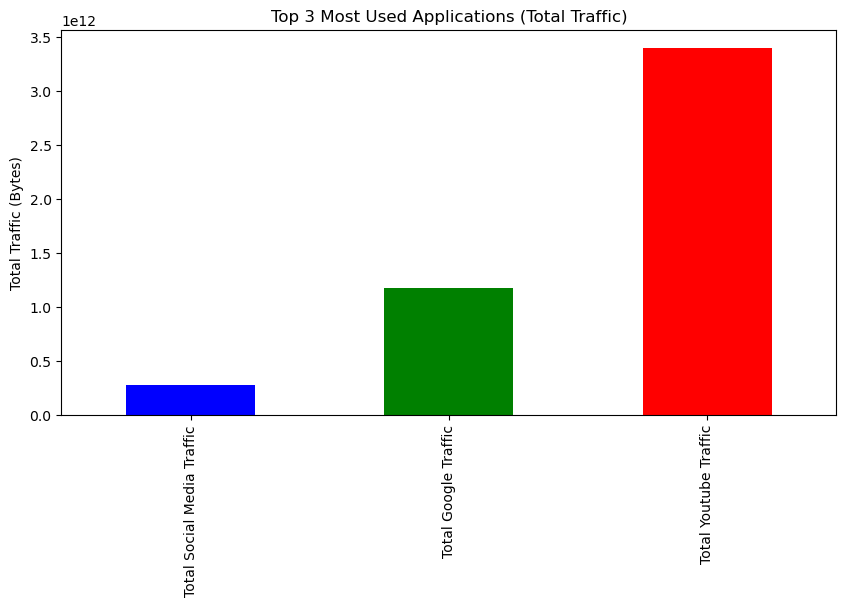

In [28]:
# Visualize top 3 most used applications
top_apps = app_traffic[['Total Social Media Traffic', 'Total Google Traffic', 'Total Youtube Traffic']].sum()

plt.figure(figsize=(10, 5))
top_apps.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Top 3 Most Used Applications (Total Traffic)')
plt.ylabel('Total Traffic (Bytes)')
plt.show()